In [109]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os

In [110]:
print(os.listdir(r'C:\Users\Md Moradul Siddique\Documents\data\flowers'))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


# Importing Required Libraries

In [111]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [112]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [113]:
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [114]:
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

In [115]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

In [116]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

In [117]:
#dl libraraies
#from keras import backend as K
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
#from keras.utils import to_categorical

In [118]:
# specifically for cnn
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [119]:
# #configure
# # sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
# style.use('fivethirtyeight')
# sns.set(style='whitegrid',color_codes=True)


import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

# Data Preparation

Making the functions to get the training and validation set from the Images

In [120]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR=r'C:\Users\Md Moradul Siddique\Documents\data\flowers\daisy'
FLOWER_SUNFLOWER_DIR=r'C:\Users\Md Moradul Siddique\Documents\data\flowers\sunflower'
FLOWER_TULIP_DIR=r'C:\Users\Md Moradul Siddique\Documents\data\flowers\tulip'
FLOWER_DANDI_DIR=r'C:\Users\Md Moradul Siddique\Documents\data\flowers\dandelion'
FLOWER_ROSE_DIR=r'C:\Users\Md Moradul Siddique\Documents\data\flowers\rose'

In [121]:
def assign_label(img,flower_type):
    return flower_type

In [122]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label)) 

In [123]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 769/769 [00:04<00:00, 179.70it/s]

769


In [124]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 734/734 [00:04<00:00, 147.11it/s]

1503


In [125]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 984/984 [00:06<00:00, 147.35it/s]

2487


In [126]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1051/1051 [00:06<00:00, 172.86it/s]

3538


In [127]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 784/784 [00:02<00:00, 335.07it/s]

4322


In [128]:
print(len(X))

4322


In [129]:
print(len(Z))
print(set(Z))

4322
{'Dandelion', 'Tulip', 'Rose', 'Daisy', 'Sunflower'}


Visualize some Random Images

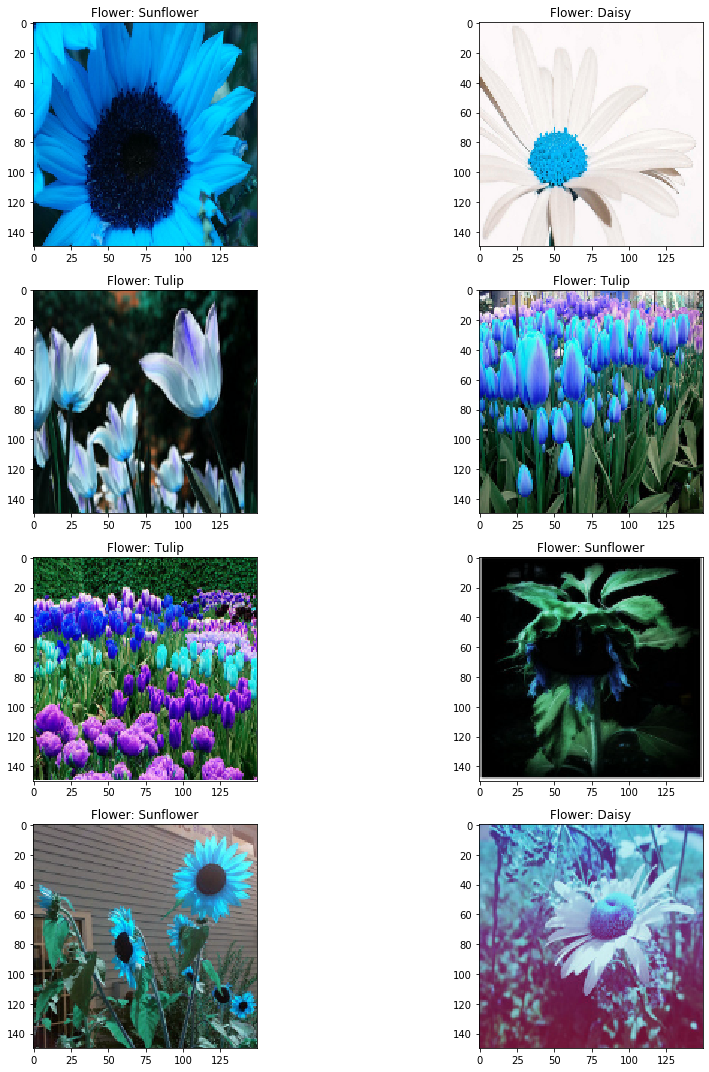

In [130]:
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout();

Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [131]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)

Y.shape

(4322, 5)

In [132]:
type(X)

list

In [133]:
X[1].shape

(150, 150, 3)

In [134]:
X[0][0]

array([[134, 136, 136],
       [143, 144, 144],
       [147, 147, 147],
       [152, 150, 150],
       [149, 150, 150],
       [148, 150, 150],
       [155, 152, 153],
       [159, 153, 153],
       [162, 157, 156],
       [162, 157, 156],
       [161, 156, 155],
       [163, 158, 157],
       [166, 161, 160],
       [167, 162, 161],
       [164, 160, 158],
       [161, 154, 154],
       [146, 142, 141],
       [137, 137, 136],
       [131, 134, 134],
       [138, 138, 138],
       [137, 138, 138],
       [135, 139, 138],
       [135, 139, 138],
       [133, 138, 137],
       [136, 141, 140],
       [135, 140, 139],
       [146, 148, 148],
       [164, 159, 160],
       [159, 154, 153],
       [150, 152, 150],
       [145, 147, 147],
       [141, 143, 143],
       [135, 140, 139],
       [136, 141, 140],
       [140, 145, 144],
       [138, 143, 142],
       [139, 144, 143],
       [143, 146, 146],
       [153, 152, 152],
       [167, 162, 162],
       [175, 170, 169],
       [174, 169

In [135]:
X_NEW=np.array(X)

# Image Standardization [Scale 0-1]
X_NEW=X_NEW/255

Splitting into Training and Validation Sets

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X_NEW,Y,test_size=0.20,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [137]:
np.shape(X_train),np.shape(y_train),np.shape(X_test),np.shape(y_test),np.shape(X_val),np.shape(y_val)

((2765, 150, 150, 3),
 (2765, 5),
 (865, 150, 150, 3),
 (865, 5),
 (692, 150, 150, 3),
 (692, 5))

Setting the Random Seeds

In [138]:
np.random.seed(42)
rn.seed(42)
#tf.set_random_seed(42)
tf.random.set_seed(42)

# Modelling

Building the CNN Model

In [139]:
# # modelling starts using a CNN.


# Initialising the CNN classifier
model = Sequential()

# Add a Convolution layer with 32 kernels of 5X5 shape with activation function ReLU
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))

# Add a Max Pooling layer of size 2X2
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

# Add another Convolution layer with 96 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Flattening the layer before fully connected layers
model.add(Flatten())

# Adding a fully connected layer with 512 neurons
model.add(Dense(512))

model.add(Activation('relu'))

# The final output layer with 5 neuron to predict the categorical classifcation
model.add(Dense(5, activation = "softmax"))

In [140]:
history1 = model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 31104)            

In [141]:
batchSize=128
ep=20
history=model.fit(X_train,y_train,batch_size=batchSize,epochs=ep,validation_data=(X_val,y_val))

Epoch 1/20
22/22 [==============================] - 90s 4s/step - loss: 1.9955 - accuracy: 0.2794 - val_loss: 1.2701 - val_accuracy: 0.4913
Epoch 2/20
22/22 [==============================] - 87s 4s/step - loss: 1.2389 - accuracy: 0.4731 - val_loss: 1.0850 - val_accuracy: 0.5520
Epoch 3/20
22/22 [==============================] - 83s 4s/step - loss: 1.0241 - accuracy: 0.5698 - val_loss: 1.0359 - val_accuracy: 0.5954
Epoch 4/20
22/22 [==============================] - 86s 4s/step - loss: 0.9643 - accuracy: 0.6208 - val_loss: 0.9626 - val_accuracy: 0.6272
Epoch 5/20
22/22 [==============================] - 86s 4s/step - loss: 0.8564 - accuracy: 0.6825 - val_loss: 0.9611 - val_accuracy: 0.6228
Epoch 6/20
22/22 [==============================] - 87s 4s/step - loss: 0.7377 - accuracy: 0.7175 - val_loss: 0.8920 - val_accuracy: 0.6546
Epoch 7/20
22/22 [==============================] - 84s 4s/step - loss: 0.5782 - accuracy: 0.7833 - val_loss: 0.9689 - val_accuracy: 0.6618
Epoch 8/20
22/22 [==

# Evaluating the Model Performance

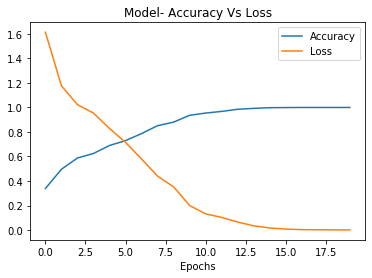

In [142]:
plt.plot(range(len(model.history.history['accuracy'])),model.history.history['accuracy'])
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'])
plt.title('Model- Accuracy Vs Loss')
plt.xlabel('Epochs')
plt.legend(['Accuracy', 'Loss'])
plt.show()

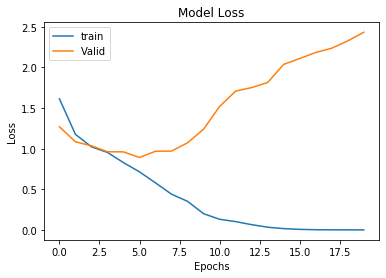

In [143]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'Valid'])
plt.show()

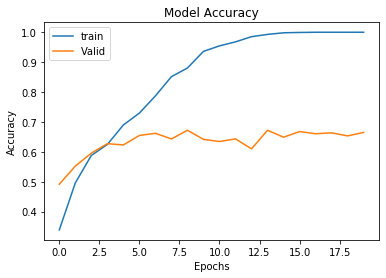

In [144]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'Valid'])
plt.show()

# Data Augmentation to prevent Overfitting [Bonus -1]

In [150]:
# # modelling starts using a CNN.


# Initialising the CNN classifier
model = Sequential()

# Add a Convolution layer with 32 kernels of 5X5 shape with activation function ReLU
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))

# Add a Max Pooling layer of size 2X2
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

# Add another Convolution layer with 96 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))

# Adding another pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Flattening the layer before fully connected layers
model.add(Flatten())

# Adding a fully connected layer with 512 neurons
model.add(Dense(512))

model.add(Activation('relu'))

# The final output layer with 5 neuron to predict the categorical classifcation
model.add(Dense(5, activation = "softmax"))

In [151]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


In [152]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [153]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 31104)            

In [154]:
batch_size=128
epochs=11
History2 = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/11
21/21 [==============================] - 96s 4s/step - loss: 1.7227 - accuracy: 0.2997 - val_loss: 1.1826 - val_accuracy: 0.5006
Epoch 2/11
21/21 [==============================] - 87s 4s/step - loss: 1.1995 - accuracy: 0.4823 - val_loss: 1.0937 - val_accuracy: 0.5653
Epoch 3/11
21/21 [==============================] - 89s 4s/step - loss: 1.0734 - accuracy: 0.5628 - val_loss: 1.0367 - val_accuracy: 0.6012
Epoch 4/11
21/21 [==============================] - 89s 4s/step - loss: 1.0313 - accuracy: 0.5926 - val_loss: 0.9604 - val_accuracy: 0.6185
Epoch 5/11
21/21 [==============================] - 90s 4s/step - loss: 0.9946 - accuracy: 0.6003 - val_loss: 0.9281 - val_accuracy: 0.6486
Epoch 6/11
21/21 [==============================] - 87s 4s/step - loss: 0.9271 - accuracy: 0.6322 - val_loss: 1.0034 - val_accuracy: 0.5965
Epoch 7/11
21/21 [==============================] - 88s 4s/step - loss: 0.9265 - accuracy: 0.6448 - val_loss: 0.9161 - val_accuracy: 0.6509
Epoch 8/11
21/21 [==

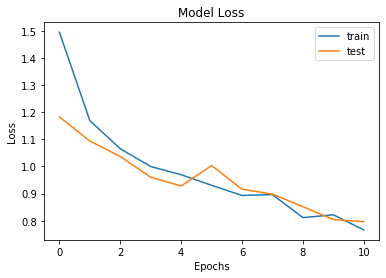

In [156]:
plt.plot(History2.history['loss'])
plt.plot(History2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

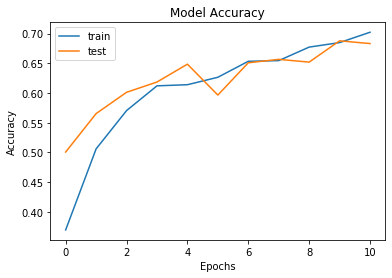

In [158]:
plt.plot(History2.history['accuracy'])
plt.plot(History2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()